In [1]:
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import cross_validate
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from webencodings import Encoding

In [2]:
Plant_Dataset = pd.read_csv('Feature_Extracted_Plant_Dataset.csv')
Plant_Dataset.describe()

,Edge_Count,Re(Mean_Frequency),Im(Mean_Frequency),Frequency_Variance,StDev_Contrast,Mean_Noise,StDev_Noise,Minimum_Intensity,Maximum_Intensity
count,1500.000000,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,3733.535333,5.989650e-01,-5.655018e-19,22014.959039,0.130521,0.536565,0.130521,0.145936,0.956581
std,3703.635039,1.935199e-01,2.498024e-17,9643.229257,0.042781,0.170824,0.042781,0.128510,0.081043
min,0.000000,2.287667e-17,-1.023487e-16,767.239036,0.039815,0.032910,0.039815,0.000000,0.512022
25%,880.750000,4.726469e-01,-1.517883e-17,15588.933324,0.099020,0.471818,0.099020,0.042561,0.957370
50%,2208.000000,6.035386e-01,-3.252607e-19,22965.973814,0.123368,0.574923,0.123368,0.112293,0.994167
75%,5652.250000,7.168188e-01,1.507041e-17,29156.339680,0.155001,0.654635,0.155001,0.225440,1.000000
max,19455.000000,1.000000e+00,1.179612e-16,45719.011444,0.329416,0.832021,0.329416,0.594200,1.000000


#### Correlation Heatmap ####

Text(0.5, 1.0, 'Heatmap of Correlation')

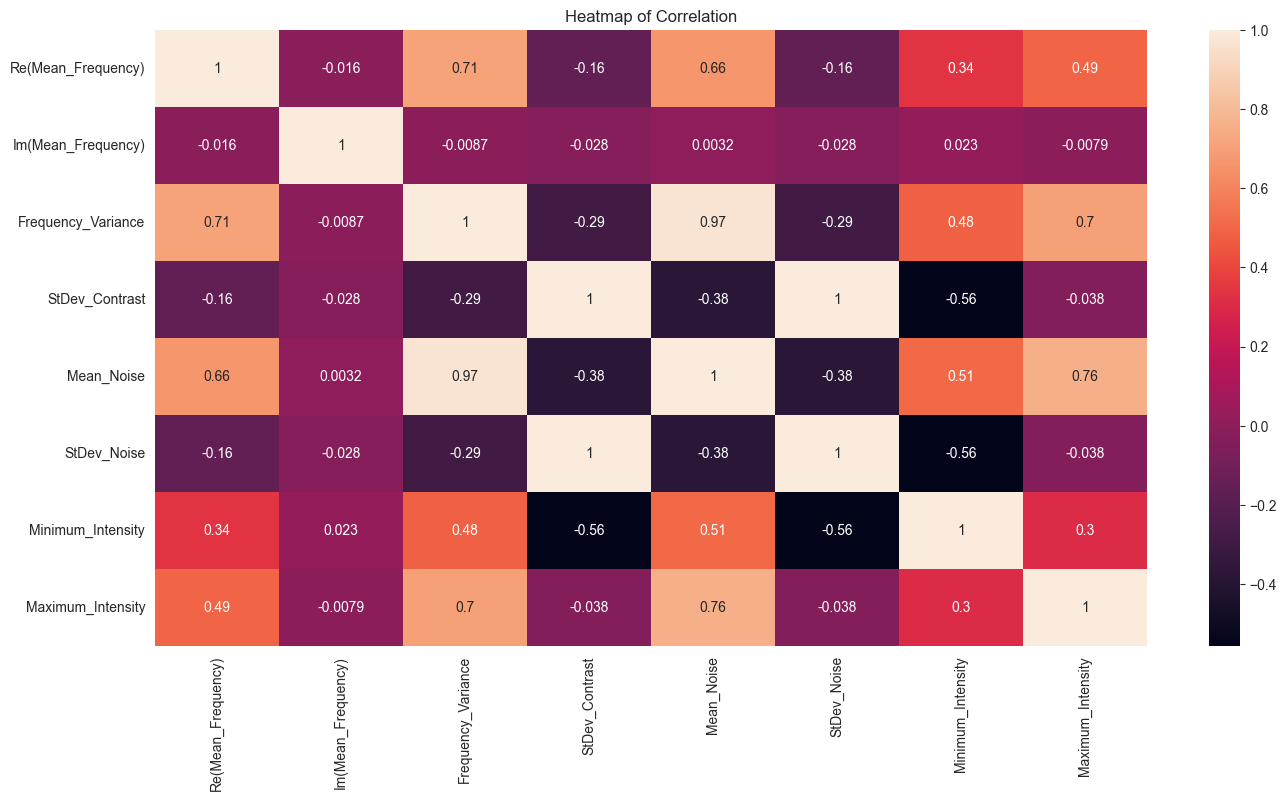

In [3]:
plt.figure(figsize=(16, 8))
sns.heatmap(Plant_Dataset.select_dtypes(['float64']).corr(), annot=True)
plt.title('Heatmap of Correlation')

#### Encode the **Disease** Feature ####

In [4]:
print("Original features:\n", list(Plant_Dataset.columns), "\n")
Plant_Dataset_dummies = pd.get_dummies(Plant_Dataset)
print("Features after get_dummies:\n", list(Plant_Dataset_dummies.columns))

Original features:
 ['Edge_Count', 'Re(Mean_Frequency)', 'Im(Mean_Frequency)', 'Frequency_Variance', 'StDev_Contrast', 'Mean_Noise', 'StDev_Noise', 'Minimum_Intensity', 'Maximum_Intensity', 'Is_Healthy', 'Disease'] 

Features after get_dummies:
 ['Edge_Count', 'Re(Mean_Frequency)', 'Im(Mean_Frequency)', 'Frequency_Variance', 'StDev_Contrast', 'Mean_Noise', 'StDev_Noise', 'Minimum_Intensity', 'Maximum_Intensity', 'Is_Healthy', 'Disease_Black_rot']


In [7]:
print(Plant_Dataset['Disease'].unique())

[nan 'Black_rot']


In [6]:
# list_of_features = []
# for feature_name in Plant_Dataset.drop(columns=['Image', 'Is_Healthy', 'Disease']).columns:
#     list_of_features.append(feature_name)    
# 
# num_features = len(Plant_Dataset.drop(columns=['Image', 'Is_Healthy', 'Disease']).columns)
# 
# for i in range(0, num_features, 2):
#     sns.set_style("whitegrid")
#     
#     plt.figure(figsize=(12, 6), dpi=150)
#     plt.subplot(1, 2, 1)
#     sns.lineplot(data = Plant_Dataset, x = list_of_features[i], y = "Disease")
#     
#     # Second plot
#     if i+1 < num_features:
#         plt.subplot(1, 2, 2)
#         sns.lineplot(data=Plant_Dataset, x = list_of_features[i+1], y = "Disease")
#     
#     # Adjust layout
#     plt.tight_layout()
#     plt.show()